In [1]:
#import all the neccesary libraries
import pandas as pd

In [2]:
import numpy as np

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
rc={'font.size': 2.5, 'axes.labelsize':2.5, 'legend.fontsize': 2.5, 
    'axes.titlesize': 2.5, 'xtick.labelsize': 2.5, 'ytick.labelsize': 2.5}
plt.rcParams.update(**rc)

In [5]:
import seaborn as sns
sns.set(rc=rc)

In [7]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [8]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve



In [10]:
emp_att = pd.DataFrame()

In [11]:
#import the dataset 
emp_att = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [12]:
#perform data exploration and data cleaning
emp_att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Y,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,N,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Y,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,N,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,N,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
emp_att.index

RangeIndex(start=0, stop=1470, step=1)

In [14]:
emp_att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
emp_att.shape

(1470, 35)

In [16]:
#checking for null values
emp_att.isnull().values.any()

False

In [17]:
#displays column type. There are numerical and categorical columns
emp_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [18]:
emp_att.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
#printing value counts 
print('value counts of Gender:\n',emp_att['Gender'].value_counts()) 
print('\nvalue counts of Job roles:\n',emp_att['JobRole'].value_counts()) 
print('\nvalue counts of Education Field:\n',emp_att['EducationField'].value_counts())
print('\nvalue counts of Department:\n',emp_att['Department'].value_counts())

value counts of Gender:
 Male      882
Female    588
Name: Gender, dtype: int64

value counts of Job roles:
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

value counts of Education Field:
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

value counts of Department:
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


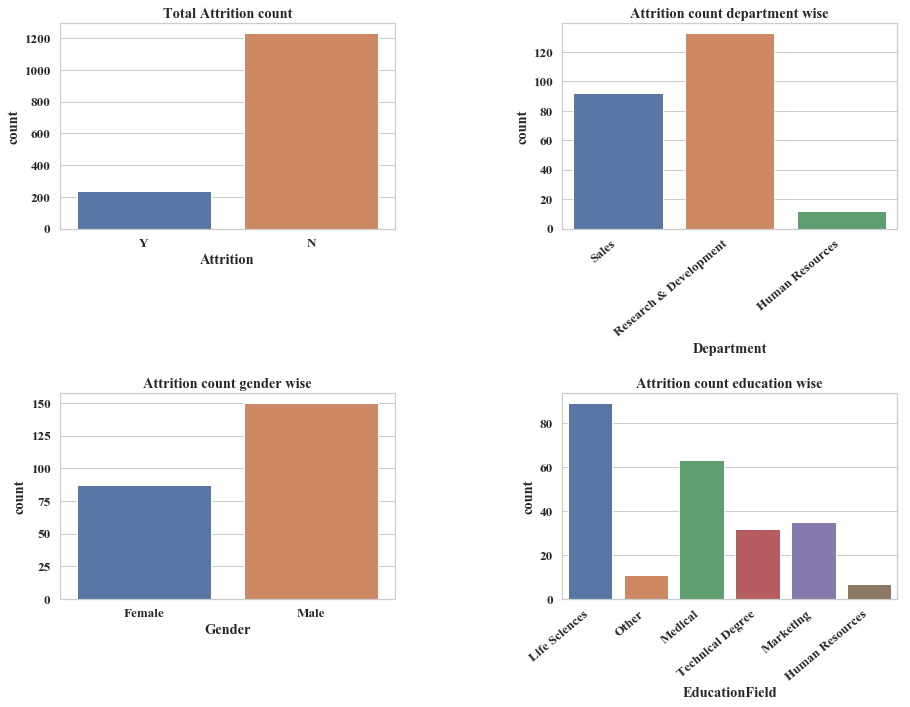

In [21]:
#plotting count plots
f, axes = plt.subplots(2, 2, figsize=(15, 10), 
                       sharex=False, sharey=False)

sns.set(style='whitegrid',font='Times New Roman')
sns.set_context('notebook', font_scale=1.2)                                                  
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)

sns.countplot((emp_att['Attrition']),ax=axes[0,0])
axes[0,0].set( title = 'Total Attrition count')

sns.countplot((emp_att[emp_att['Attrition'] == 'Y']['Department']),ax=axes[0,1])
axes[0,1].set( title = 'Attrition count department wise')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=40, ha="right")

sns.countplot((emp_att[emp_att['Attrition'] == 'Y']['Gender']),ax=axes[1,0])
axes[1,0].set( title = 'Attrition count gender wise')

sns.countplot((emp_att[emp_att['Attrition'] == 'Y']['EducationField']),ax=axes[1,1])
axes[1,1].set( title = 'Attrition count education wise')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40, ha="right")

plt.show()





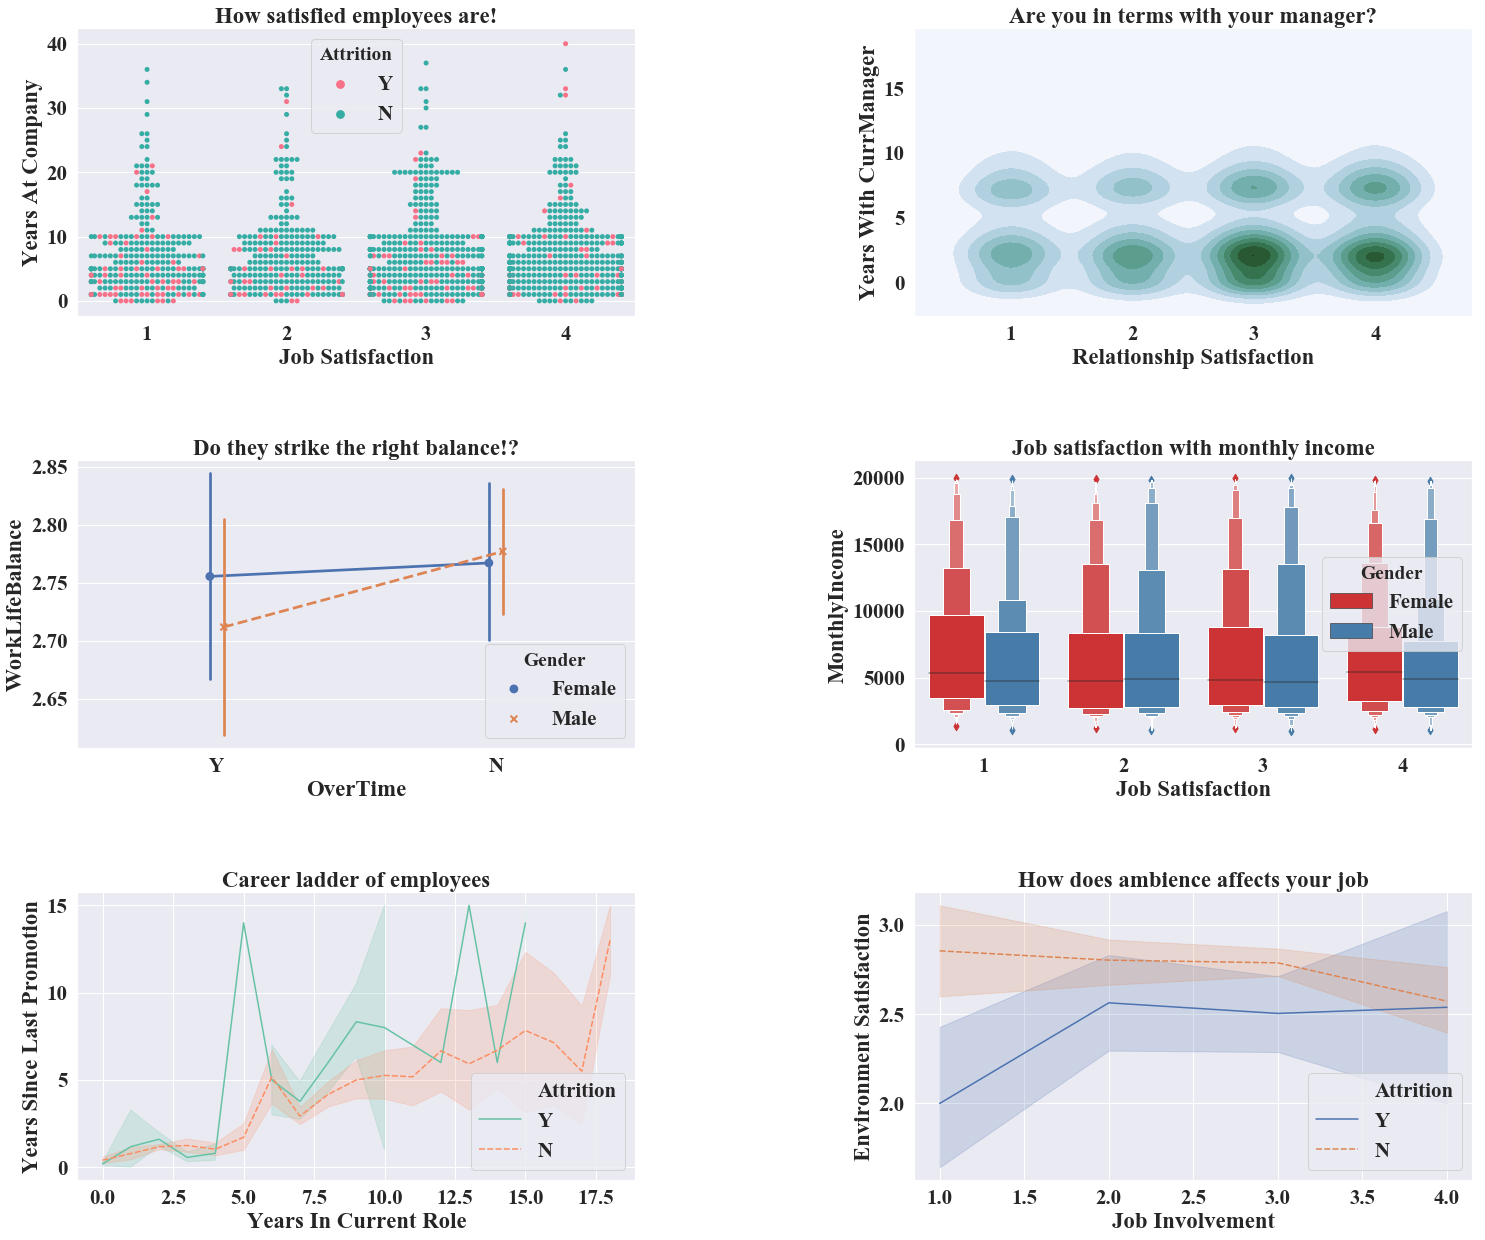

In [23]:
#plotting catergorical plots of different features
f, axes = plt.subplots(3, 2, figsize=(25, 20), 
                       sharex=False, sharey=False)

sns.set(style="darkgrid",font='Times New Roman')
sns.set_context('notebook', font_scale=1.9) 
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)   #layout adjustments

y = emp_att['YearsAtCompany'].values
x = emp_att['JobSatisfaction'].values
sns.swarmplot(x,y,hue=emp_att['Attrition'],palette = 'husl',edgecolor='gray',size=5,ax=axes[0,0])
axes[0,0].set( title = 'How satisfied employees are!')
axes[0,0].set(xlabel = 'Job Satisfaction')
axes[0,0].set( ylabel ='Years At Company')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
x = emp_att['RelationshipSatisfaction'].values
y = emp_att['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[0,1])
axes[0,1].set( title = 'Are you in terms with your manager?')
axes[0,1].set(xlabel = 'Relationship Satisfaction')
axes[0,1].set( ylabel ='Years With CurrManager')

x = emp_att['OverTime'].values
y = emp_att['WorkLifeBalance'].values
sns.pointplot(x, y,palette='deep', hue=emp_att['Gender'],markers=["o", "x"], linestyles=["-", "--"], 
              dodge=True,ax=axes[1,0])
axes[1,0].set( title = 'Do they strike the right balance!?')
axes[1,0].set(xlabel = 'OverTime')
axes[1,0].set( ylabel ='WorkLifeBalance')


x = emp_att['JobSatisfaction'].values
y = emp_att['MonthlyIncome'].values
sns.boxenplot(x, y, hue=emp_att['Gender'], palette='Set1',  ax=axes[1,1])
axes[1,1].set( title = 'Job satisfaction with monthly income')
axes[1,1].set(xlabel = 'Job Satisfaction')
axes[1,1].set( ylabel ='MonthlyIncome')

x = emp_att['YearsInCurrentRole'].values
y = emp_att['YearsSinceLastPromotion'].values
sns.lineplot(x, y, hue=emp_att['Attrition'], palette='Set2',style=emp_att['Attrition'],  ax=axes[2,0])
axes[2,0].set( title = 'Career ladder of employees')
axes[2,0].set(xlabel = 'Years In Current Role')
axes[2,0].set( ylabel ='Years Since Last Promotion')


x = emp_att['JobInvolvement'].values
y = emp_att['EnvironmentSatisfaction'].values
sns.lineplot(x, y, hue=emp_att['Attrition'], palette='deep',style=emp_att['Attrition'],  ax=axes[2,1])
axes[2,1].set( title = 'How does ambience affects your job')
axes[2,1].set(xlabel = 'Job Involvement')
axes[2,1].set( ylabel ='Environment Satisfaction')

plt.show()

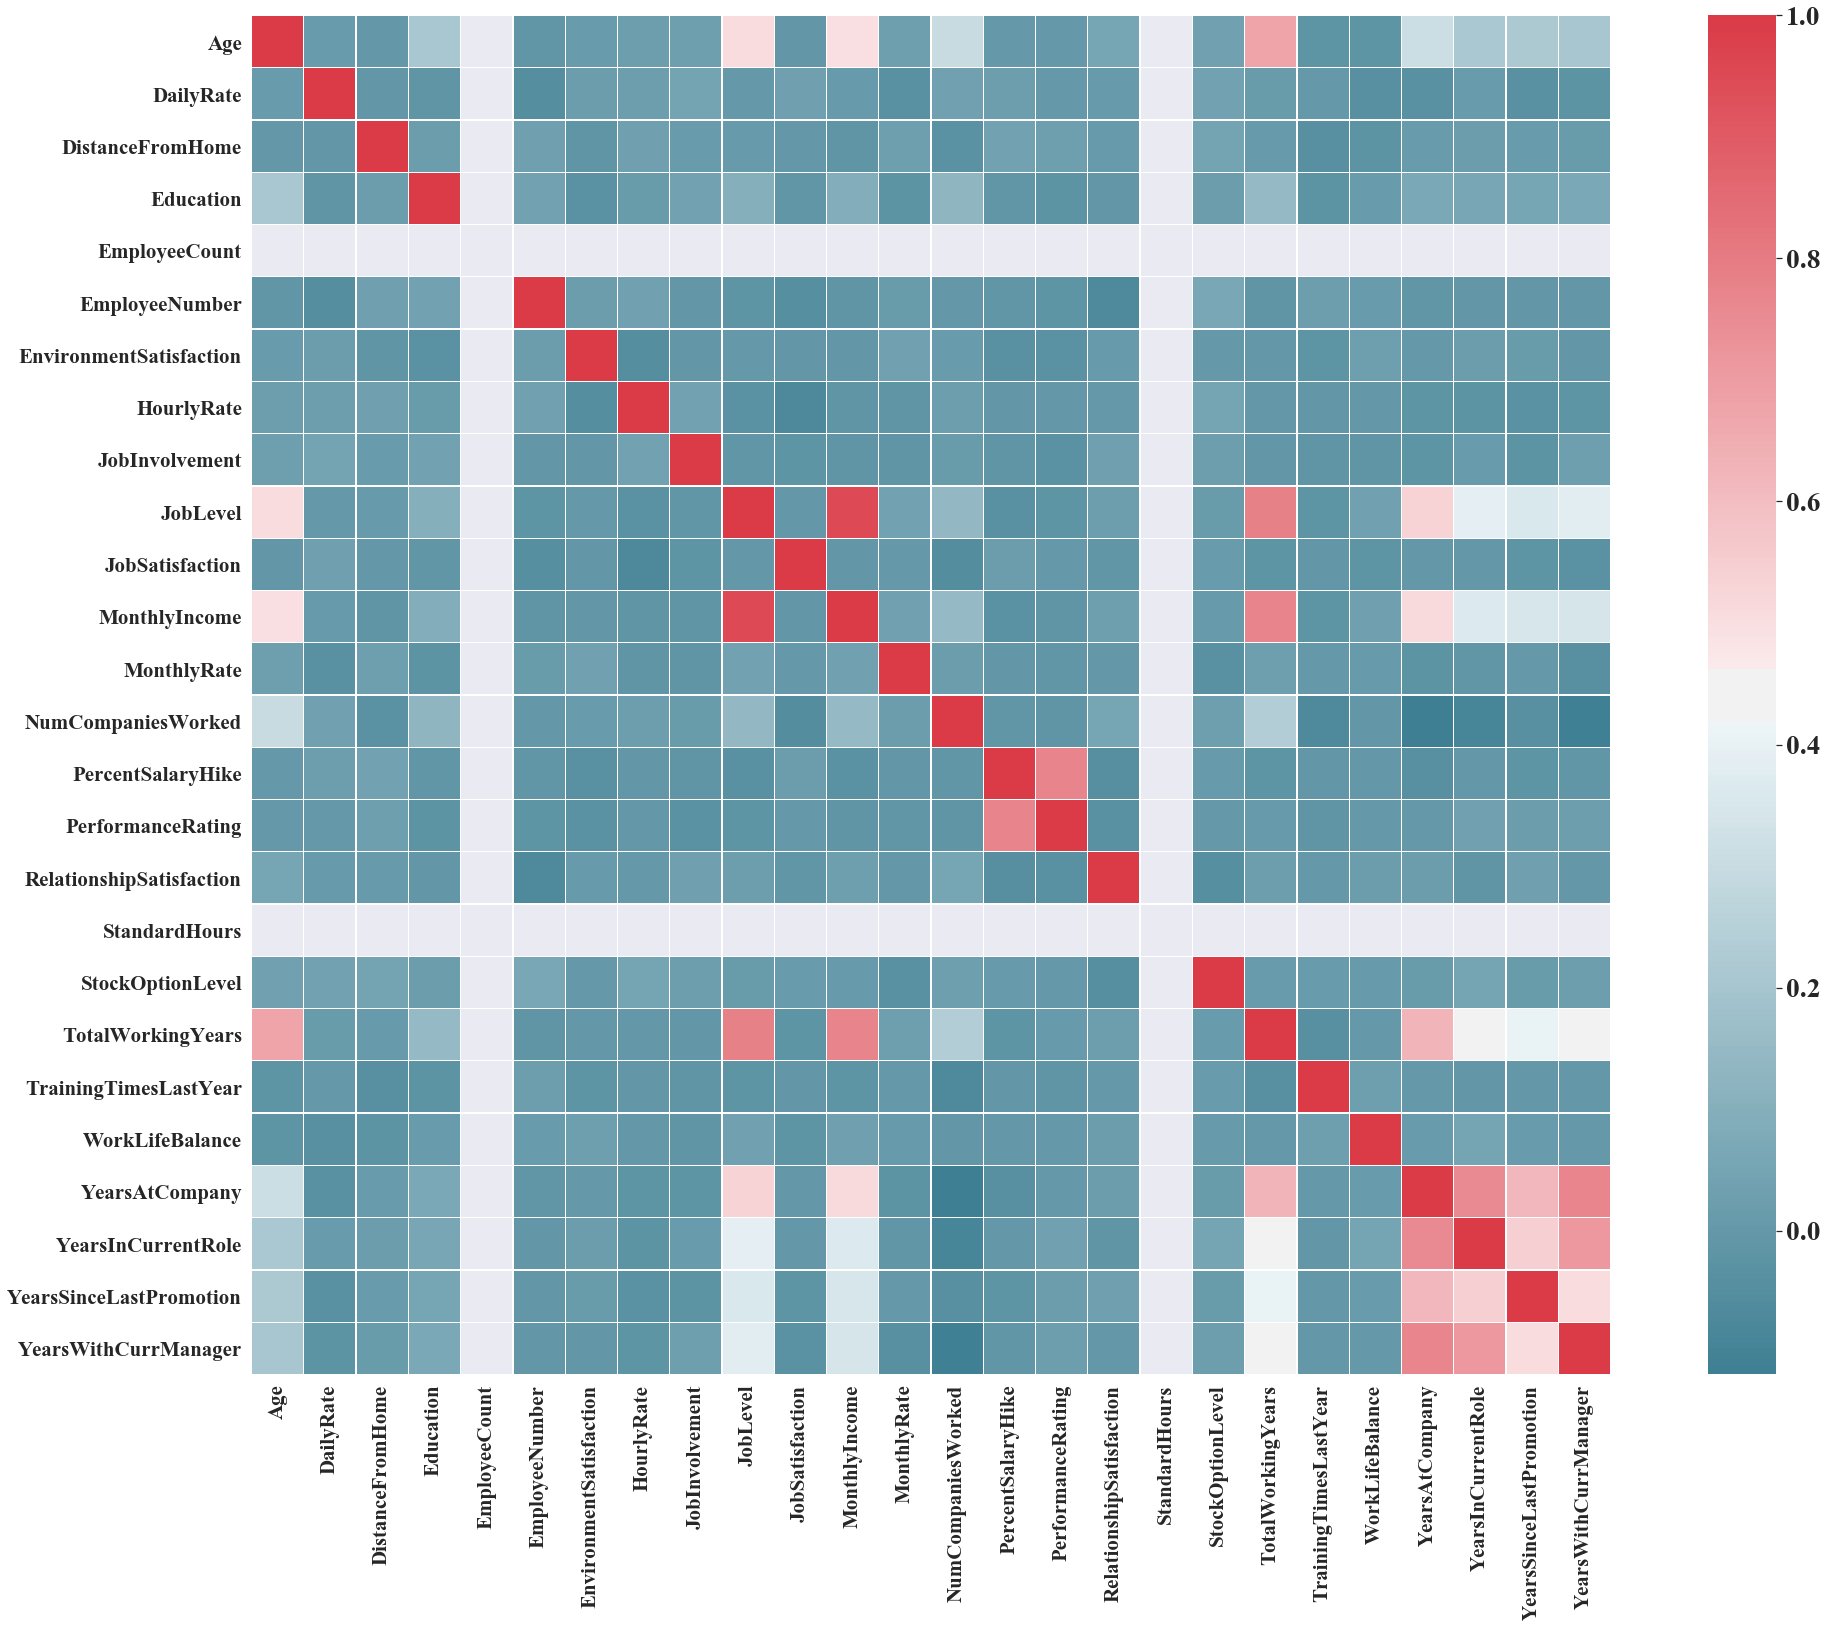

In [24]:
#feature correlation heatmap
f, ax = plt.subplots(figsize=(35, 25))
sns.set(style="ticks",font='Times New Roman')
sns.set_context('notebook', font_scale=2.5)
corr = emp_att.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=False,linewidths=.3, ax=ax)

plt.show()

In [25]:
#label encoder to encode catergorical values to numerical values
le = preprocessing.LabelEncoder()

In [26]:
#!pip install -U imbalanced-learn

In [27]:
#separating object dtypes into a dataframe
att_cat = emp_att.select_dtypes(include=['object']).copy()

In [28]:
#separating numerical columns into numerical dataframe
att_num = emp_att.select_dtypes(include=['int64']).copy()

In [29]:
#label encoding catergorical dataframe
att_cat_encoded = att_cat.apply(le.fit_transform)

In [30]:
#combining numerical and encoded dataframe 
attrition = pd.concat([att_cat_encoded,att_num], axis=1 )

In [31]:
#new attrition dataframe with only numerical values
attrition.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,0,1,41,...,1,80,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,0,49,...,4,80,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,0,1,37,...,2,80,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,0,1,33,...,3,80,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,0,27,...,4,80,1,6,3,3,2,2,2,2


In [32]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
Department                  1470 non-null int32
EducationField              1470 non-null int32
Gender                      1470 non-null int32
JobRole                     1470 non-null int32
MaritalStatus               1470 non-null int32
Over18                      1470 non-null int32
OverTime                    1470 non-null int32
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1

In [33]:
#defining data and target arrays
empdata = np.array(attrition.drop(['Attrition', 'Over18','EmployeeNumber', 'EmployeeCount', 'StandardHours', 'TrainingTimesLastYear','StockOptionLevel'],1))
target = np.array(attrition['Attrition'])

In [34]:
#train test split
train, test, train_target, test_target = train_test_split(empdata,target,test_size=0.20, random_state=0)

In [35]:
# Using RUS from imblearn sklearn package to treat data imbalance
#combinesampler=SMOTETomek(ratio='auto',random_state=100)
#smote_train,smote_target = combinesampler.fit_resample(train,train_target)

rus = RandomUnderSampler(random_state=100)
rus_train, rus_target = rus.fit_resample(train, train_target)

In [36]:
#resampling done
print('Original training dataset shape %s' % Counter(train_target))
print('Resampled training dataset shape %s' % Counter(rus_target))

Original training dataset shape Counter({0: 988, 1: 188})
Resampled training dataset shape Counter({0: 188, 1: 188})


In [37]:
#defining parameter dictionary for random forest classifier
param_grid = [ {'min_samples_leaf': np.arange(2,10,2), 'max_depth': np.arange(2,10,2),'max_leaf_nodes': np.arange(2,10,2)}]

In [38]:
#grid search
grid_bin = GridSearchCV(RandomForestClassifier(max_features = 'auto' ,n_estimators =1000, class_weight = 'balanced_subsample',random_state = 84,n_jobs=-1), param_grid, cv=5, scoring = 'roc_auc')
grid_bin.fit(rus_train, rus_target)

C:\Users\Harini Pravin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=84,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_leaf': array([2, 4, 6, 8]), 'max_depth': array([2, 4, 6, 8]), 'max_leaf_nodes': array([2, 4, 6, 8])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [39]:
#predicting for test data
rf_predict = grid_bin.predict(test)

In [36]:
#score parameters
print("Test set score: {:.2f}".format(grid_bin.score(test, test_target)))
print('--------------------------------------------\n')
print("Train set score: {:.2f}".format(grid_bin.score(rus_train, rus_target)))
print('--------------------------------------------\n')
print("Best parameters: {}".format(grid_bin.best_params_))
print('--------------------------------------------\n')
print("Best cross-validation score: {:.2f}".format(grid_bin.best_score_))
print('--------------------------------------------\n')
print("Best estimator:\n{}".format(grid_bin.best_estimator_))
print('--------------------------------------------\n')





Test set score: 0.75
--------------------------------------------

Train set score: 0.89
--------------------------------------------

Best parameters: {'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 4}
--------------------------------------------

Best cross-validation score: 0.75
--------------------------------------------

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=84,
            verbose=0, warm_start=False)
--------------------------------------------



In [40]:
#plotting feature importance for random forest with the best parameters
names =['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel', 'JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
        'TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
rf_class = RandomForestClassifier(max_features='auto', max_depth=4 , min_samples_leaf= 4, max_leaf_nodes= 8,n_estimators=1000,class_weight = 'balanced_subsample',random_state=84).fit(rus_train, rus_target)
rf_prob = rf_class.predict_proba(test)
F_imp = rf_class.feature_importances_

In [38]:
trace = go.Scatter(
    y = F_imp,
    x = names,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = F_imp,
        colorscale='Portland',
        showscale=True
    ),
    text = names
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=True,
        zeroline=True,
        showline=True
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=True,
        zeroline=True,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='attritionplot')

In [41]:
print('The order of classes in rf_prob output is:',rf_class.classes_)

The order of classes in rf_prob output is: [0 1]


AUC_ROC for rf: 0.750
--------------------------------------------

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       245
           1       0.45      0.57      0.50        49

   micro avg       0.81      0.81      0.81       294
   macro avg       0.68      0.72      0.69       294
weighted avg       0.83      0.81      0.82       294



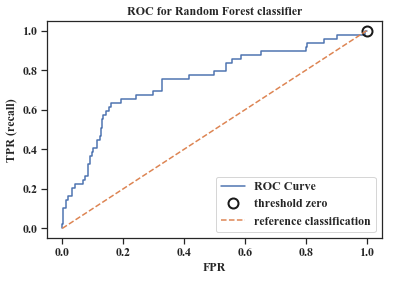

In [43]:
#calculating AUC score and plotting ROC curve
rf_auc = roc_auc_score(test_target, rf_prob[:,1])
print('AUC_ROC for rf: {:.3f}'.format(rf_auc))
print('--------------------------------------------\n')

print("Classification report:\n",classification_report(test_target, rf_predict))


fpr, tpr, threshold = roc_curve(test_target, rf_prob[:,1])


plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title('ROC for Random Forest classifier')
rc={'font.size': 12, 'axes.labelsize':12, 'legend.fontsize': 12, 
    'axes.titlesize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
plt.rcParams.update(**rc)

close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


x = np.arange(0,1.2,0.2)
y = np.arange(0,1.2,0.2)
plt.plot(x,y,'--',label = 'reference classification')
plt.legend(loc=4)


plt.show()

Confusion matrix for above trained Random Forest Classifier

 [[211  34]
 [ 21  28]]


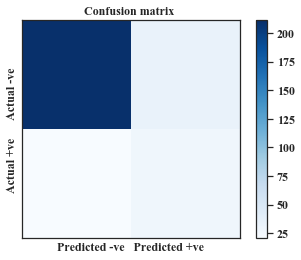

In [44]:
#plotting confusion matrix for random forest classifier
cm = confusion_matrix(test_target , rf_predict)
print('Confusion matrix for above trained Random Forest Classifier\n\n',cm)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted -ve   Predicted +ve")
plt.ylabel("Actual +ve      Actual -ve")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()